In [1]:
import re
import pandas as pd
import string


In [2]:
f=open('WhatsApp Chat with RIT FALL 23.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)


8/1/23, 11:42 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
12/27/22, 07:02 - ~ MP created group "RIT FALL 23"
12/27/22, 07:02 - New members need admin approval to join this group.
8/1/23, 11:42 - You joined a group via invite in the community: Rochester Institute of Technology - Fall 2023
8/1/23, 11:49 - +91 93241 44463 joined using this group's invite link
8/1/23, 12:06 - +91 88797 13192: What plan are you takinf
8/1/23, 12:07 - +91 96192 64870: u can try getting used books
8/1/23, 12:07 - +91 96192 64870: maybe cheaper
8/1/23, 12:08 - +91 88797 13192: Yeah man...I thought that'd be included in our tution fees
8/1/23, 12:08 - +91 88797 13192: Scamed us
8/1/23, 12:09 - +91 76248 08094: Online pdf too probably
8/1/23, 12:09 - +91 96192 64870: only thing being don't get caught 🌝
8/1/23, 12:10 - +91 76248 08094: Good point
8/1/23, 12:10 - +91 96192 64870: they take downloading books illegally 

In [5]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
#there was an empty string being extracted here so i had to omit it
messages=re.split(pattern, data)[1:]
len(messages)

2056

In [7]:
dates=re.findall(pattern, data)
dates
len(dates)

2056

In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})


In [9]:
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
#chats where in m.d.y format, so i had to alter the code language as well,
#another approach to fix that was maybe use the errors='coerce'  to declare those values
# NaT which cause problems while parsing but would reduce the rows 
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-08-01 11:42:00
1,"~ MP created group ""RIT FALL 23""\n",2022-12-27 07:02:00
2,New members need admin approval to join this g...,2022-12-27 07:02:00
3,You joined a group via invite in the community...,2023-08-01 11:42:00
4,+91 93241 44463 joined using this group's invi...,2023-08-01 11:49:00


In [10]:
print(df)

                                           user_message                date
0     Messages and calls are end-to-end encrypted. N... 2023-08-01 11:42:00
1                    ~ MP created group "RIT FALL 23"\n 2022-12-27 07:02:00
2     New members need admin approval to join this g... 2022-12-27 07:02:00
3     You joined a group via invite in the community... 2023-08-01 11:42:00
4     +91 93241 44463 joined using this group's invi... 2023-08-01 11:49:00
...                                                 ...                 ...
2051  +1 (585) 604-6917: Hello there,\n\nI'm want to... 2023-12-16 18:29:00
2052  +91 96031 78706: Cookie-Jar Event: \nDear Frie... 2023-12-17 00:14:00
2053  +91 98448 17408: I'm reletting a room in 2bed ... 2023-12-17 10:40:00
2054  +1 (585) 957-8018: Hello everyone, My name is ... 2023-12-18 11:44:00
2055  +1 (640) 696-0214: Hello everyone, \nAnyone tr... 2023-12-19 15:07:00

[2056 rows x 2 columns]


In [11]:
users = []
messages = []
special_message = "You joined a group via invite in the community"
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if special_message in message:
        users.append('group_notification')
        messages.append(special_message)
    elif entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users

# Make sure both lists have the same length
if len(messages) < len(df):
    messages.append(None)  # Add a placeholder value for the extra row

df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()


,date,user,message
0,2023-08-01 11:42:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-12-27 07:02:00,group_notification,"~ MP created group ""RIT FALL 23""\n"
2,2022-12-27 07:02:00,group_notification,New members need admin approval to join this g...
3,2023-08-01 11:42:00,group_notification,You joined a group via invite in the community
4,2023-08-01 11:49:00,group_notification,+91 93241 44463 joined using this group's invi...


In [12]:
print((df['message']==None).sum())

0


In [13]:
df['year']=df['date'].dt.year
df.head()

,date,user,message,year
0,2023-08-01 11:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2022-12-27 07:02:00,group_notification,"~ MP created group ""RIT FALL 23""\n",2022
2,2022-12-27 07:02:00,group_notification,New members need admin approval to join this g...,2022
3,2023-08-01 11:42:00,group_notification,You joined a group via invite in the community,2023
4,2023-08-01 11:49:00,group_notification,+91 93241 44463 joined using this group's invi...,2023


In [14]:
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-08-01 11:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,1,11,42
1,2022-12-27 07:02:00,group_notification,"~ MP created group ""RIT FALL 23""\n",2022,December,27,7,2
2,2022-12-27 07:02:00,group_notification,New members need admin approval to join this g...,2022,December,27,7,2
3,2023-08-01 11:42:00,group_notification,You joined a group via invite in the community,2023,August,1,11,42
4,2023-08-01 11:49:00,group_notification,+91 93241 44463 joined using this group's invi...,2023,August,1,11,49


In [15]:
df["user"]=='Pranam Shetty'

0       False
1       False
2       False
3       False
4       False
        ...  
2051    False
2052    False
2053    False
2054    False
2055    False
Name: user, Length: 2056, dtype: bool

In [16]:
no_of_messages=df[df['message']=='<Media omitted>\n'].shape[0]
print(no_of_messages)

63


In [17]:
from urlextract import URLExtract
extractor = URLExtract()
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [18]:
links

['https://www.reddit.com/r/personalfinance/comments/vhiu4i/apartment_complex_wants_to_charge_me_to_build_my/',
 'https://www.reddit.com/r/rit/comments/o4xhg0/bank_account/?utm_source=share&utm_medium=web2x&context=3',
 'https://chat.whatsapp.com/GS0gTqYGwnRBzpSMrSuTJ4',
 'eservices.rit.edu',
 'https://youtu.be/J1pYNsK6ig8',
 'https://refer.discover.com/s/qa6rrc',
 'deserve.com/41C4B',
 'https://www.rit.edu/admissions/graduate/accepted-students/international',
 'https://www.cbp.gov/travel/us-citizens/know-before-you-go/prohibited-and-restricted-items',
 'https://chat.whatsapp.com/CNthSr0P7vuBLeniYxaJmt',
 'https://zolve.onelink.me/o1XN?deep_link_sub2=ZOLVE-1WG3R8KG&referral_code=ZOLVE-1WG3R8KG',
 'https://chat.whatsapp.com/KlWQkkPldsJ1Q61sqCFOnN',
 'https://reddit.com/r/rit/s/2XH0Abqt6Y',
 'https://forms.gle/rB1uxy2bJNhbJPP3A',
 'https://forms.gle/JmrzEHpHUGeyPQC46',
 'https://arc.net/gift/88ba371b',
 'https://www.themarshallrochester.com/',
 'https://chat.whatsapp.com/ESFKwFwoEUO874fJB

In [19]:
df

,date,user,message,year,month,day,hour,minute
0,2023-08-01 11:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,1,11,42
1,2022-12-27 07:02:00,group_notification,"~ MP created group ""RIT FALL 23""\n",2022,December,27,7,2
2,2022-12-27 07:02:00,group_notification,New members need admin approval to join this g...,2022,December,27,7,2
3,2023-08-01 11:42:00,group_notification,You joined a group via invite in the community,2023,August,1,11,42
4,2023-08-01 11:49:00,group_notification,+91 93241 44463 joined using this group's invi...,2023,August,1,11,49
...,...,...,...,...,...,...,...,...
2051,2023-12-16 18:29:00,+1 (585) 604-6917,"Hello there,\n\nI'm want to relet my room in C...",2023,December,16,18,29
2052,2023-12-17 00:14:00,+91 96031 78706,"Cookie-Jar Event \nDear Friends, Today I came...",2023,December,17,0,14
2053,2023-12-17 10:40:00,+91 98448 17408,I'm reletting a room in 2bed 2bath at the Mar...,2023,December,17,10,40
2054,2023-12-18 11:44:00,+1 (585) 957-8018,"Hello everyone, My name is Hitiksha Morzariya....",2023,December,18,11,44


In [20]:
x=df['user'].value_counts().head()

In [21]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4],
 [Text(0, 0, 'group_notification'),
  Text(1, 0, '+91 73870 43914'),
  Text(2, 0, '+91 96192 64870'),
  Text(3, 0, '+91 75501 19042'),
  Text(4, 0, '+91 99960 60246')])

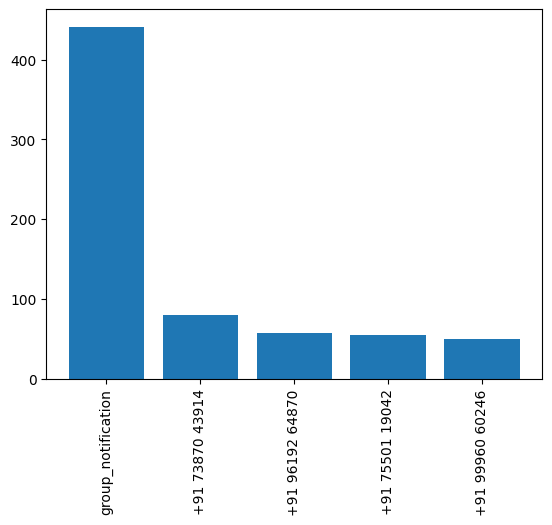

In [22]:
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [23]:
x=round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'count':'percent', 'user':'name'})
print(x)

                   name  percent
0    group_notification    21.45
1       +91 73870 43914     3.89
2       +91 96192 64870     2.82
3       +91 75501 19042     2.68
4       +91 99960 60246     2.43
..                  ...      ...
215     +91 97406 00982     0.05
216     +91 73396 78298     0.05
217     +91 86684 58146     0.05
218     +91 98694 39351     0.05
219   +1 (640) 696-0214     0.05

[220 rows x 2 columns]


In [24]:
from wordcloud import WordCloud

In [25]:
def create_wordcloud(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    df_wc = wc.generate(df['message'].str.cat(sep=" "))
    return df_wc

<Figure size 640x480 with 0 Axes>

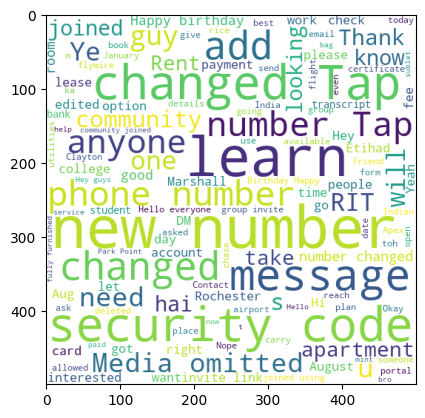

<Figure size 640x480 with 0 Axes>

In [26]:
selected_user='Overall'
df_wc = create_wordcloud(selected_user, df)
fig, ax = plt.subplots()
ax.imshow(df_wc)
plt.imshow(df_wc)
plt.figure()

In [27]:
temp=df[df['user']=='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [28]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()

In [29]:
words=[]
for messages in temp['message']:
    for word in messages.lower().split():
        word_without_punctuation = ''.join(char for char in word if char not in string.punctuation)
        if word_without_punctuation not in stop_words:
            words.append(word_without_punctuation)
    

In [30]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,changed,344
1,number,318
2,tap,292
3,learn,186
4,security,185
5,code,185
6,phone,106
7,message,106
8,585,102
9,joined,77


In [31]:
print(stop_words)

.
..
...
?
-
--
+91
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [32]:
df['message']

0       Messages and calls are end-to-end encrypted. N...
1                      ~ MP created group "RIT FALL 23"\n
2       New members need admin approval to join this g...
3          You joined a group via invite in the community
4       +91 93241 44463 joined using this group's invi...
                              ...                        
2051    Hello there,\n\nI'm want to relet my room in C...
2052     Cookie-Jar Event \nDear Friends, Today I came...
2053     I'm reletting a room in 2bed 2bath at the Mar...
2054    Hello everyone, My name is Hitiksha Morzariya....
2055    Hello everyone, \nAnyone travelling to Hyderab...
Name: message, Length: 2056, dtype: object

In [33]:


def most_common_words(selected_user, df):
    f=open('stop_hinglish.txt','r')
    stop_words=f.read()
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] == 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']

    words = []

    for messages in temp['message']:
        for word in messages.lower().split():
            word_without_punctuation = ''.join(char for char in word if char not in string.punctuation)
            if word_without_punctuation not in stop_words:
                words.append(word_without_punctuation)

    most_common_df = pd.DataFrame(Counter(words).most_common(20))
    return most_common_df


NameError: name 'pyplot' is not defined

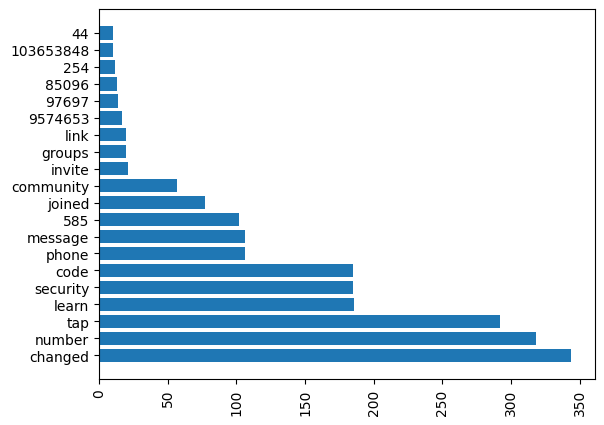

In [34]:

most_common_df = most_common_words(selected_user, df)

fig, ax = plt.subplots()

ax.barh(most_common_df[0], most_common_df[1])
plt.xticks(rotation='vertical')


pyplot(fig)  

In [ ]:
selected_user="Pranam Shetty" #
most_common_df = most_common_words(selected_user, df)
print(most_common_df)

Empty DataFrame
Columns: []
Index: []


In [36]:
df['month_num']=df['date'].dt.month

In [38]:
df['month_num']


0        8
1       12
2       12
3        8
4        8
        ..
2051    12
2052    12
2053    12
2054    12
2055    12
Name: month_num, Length: 2056, dtype: int32

In [41]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [42]:
timeline


,year,month_num,month,message
0,2022,12,December,2
1,2023,8,August,1713
2,2023,9,September,102
3,2023,10,October,64
4,2023,11,November,96
5,2023,12,December,79


In [44]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [46]:
time

['December-2022',
 'August-2023',
 'September-2023',
 'October-2023',
 'November-2023',
 'December-2023']

In [47]:
timeline['time']=time

In [48]:
timeline

,year,month_num,month,message,time
0,2022,12,December,2,December-2022
1,2023,8,August,1713,August-2023
2,2023,9,September,102,September-2023
3,2023,10,October,64,October-2023
4,2023,11,November,96,November-2023
5,2023,12,December,79,December-2023


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'December-2022'),
  Text(1, 0, 'August-2023'),
  Text(2, 0, 'September-2023'),
  Text(3, 0, 'October-2023'),
  Text(4, 0, 'November-2023'),
  Text(5, 0, 'December-2023')])

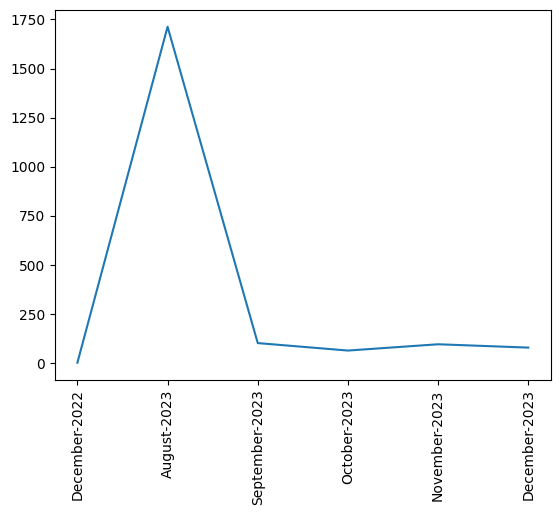

In [50]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [56]:
df['only_date']=df['date'].dt.date
daily_timeline=df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2022-12-27,2
1,2023-08-01,119
2,2023-08-02,82
3,2023-08-03,154
4,2023-08-04,138
...,...,...
124,2023-12-15,1
125,2023-12-16,1
126,2023-12-17,2
127,2023-12-18,1


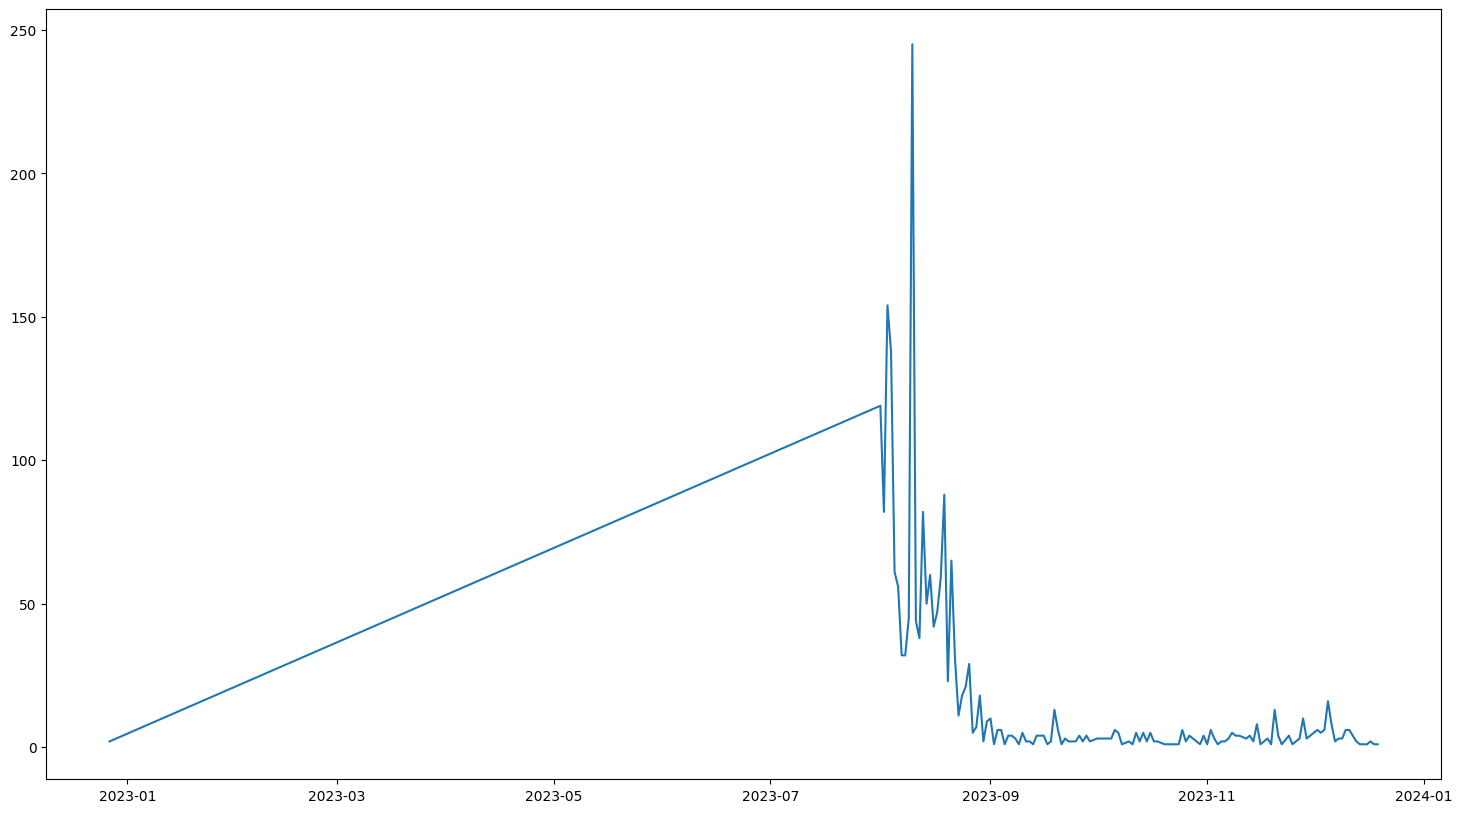

In [55]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [57]:
df['day_name']=df['date'].dt.day_name()

In [58]:
df['day_name'].value_counts()

day_name
Thursday     510
Tuesday      331
Friday       319
Saturday     250
Wednesday    232
Sunday       207
Monday       207
Name: count, dtype: int64